In [101]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
sns.set()
from pandas.plotting import radviz
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

In [102]:
#iris = pd.read_csv('iris.csv')
iris = sns.load_dataset("iris")
iris = shuffle(iris)
iris.shape

(150, 5)

In [103]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
112,6.8,3.0,5.5,2.1,virginica
114,5.8,2.8,5.1,2.4,virginica
135,7.7,3.0,6.1,2.3,virginica
111,6.4,2.7,5.3,1.9,virginica
139,6.9,3.1,5.4,2.1,virginica


In [104]:
iris.species.unique()

array(['virginica', 'setosa', 'versicolor'], dtype=object)

In [105]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<IPython.core.display.Javascript object>


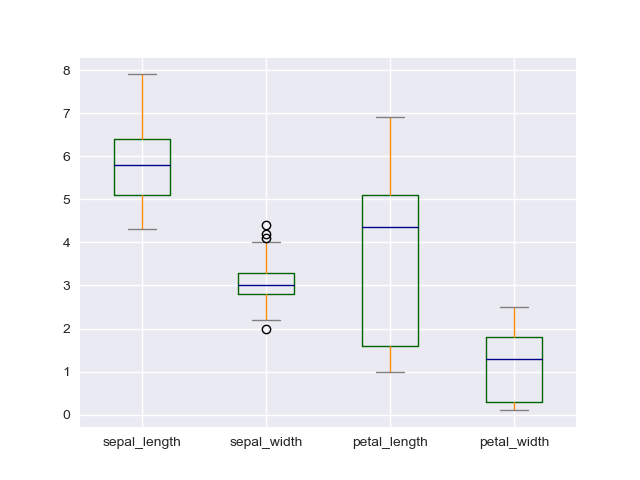

In [106]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
iris.plot.box(color=color)

<IPython.core.display.Javascript object>


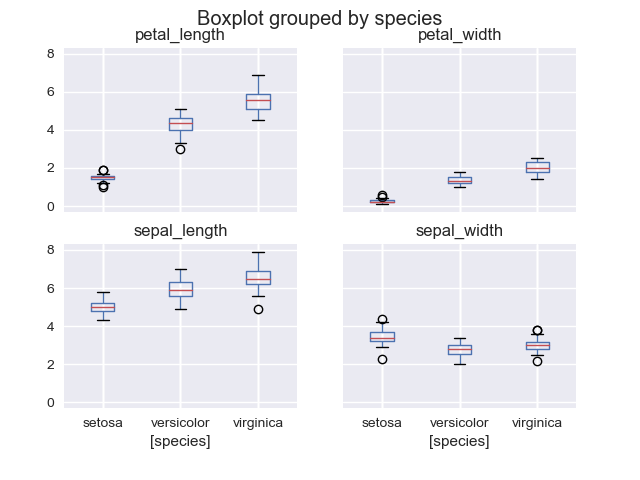

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a240c1550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a243c0c50>]], dtype=object)

In [107]:
iris.boxplot(by='species')

<IPython.core.display.Javascript object>


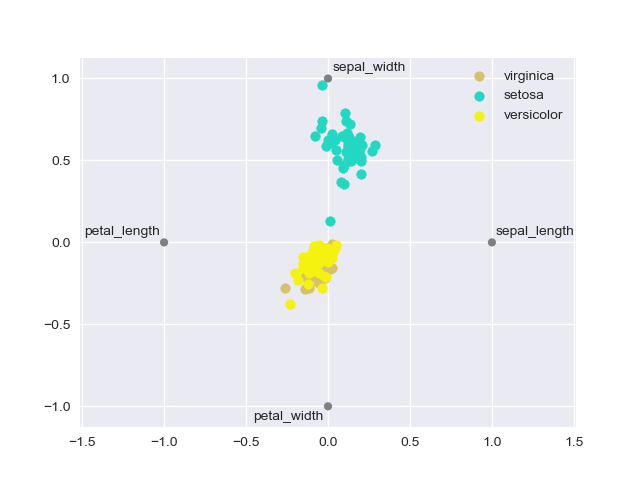

In [108]:
plt.figure()
radviz(iris,'species')

<IPython.core.display.Javascript object>


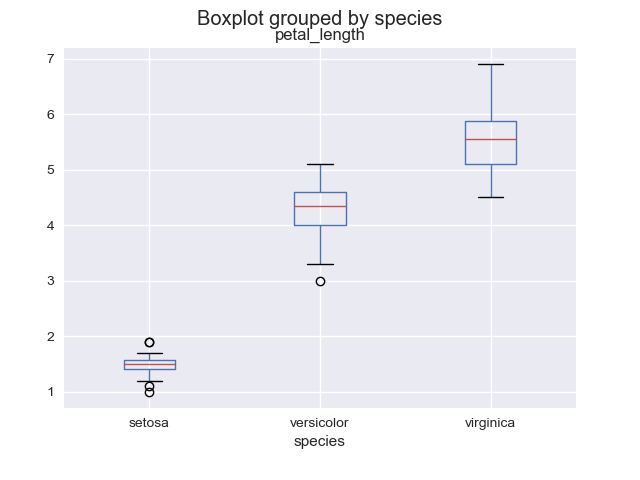

In [109]:
iris.boxplot(['petal_length'], by='species')

In [ ]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = np.ravel(iris[['species']])

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [111]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(112, 4) (38, 4) (112,) (38,)


In [119]:
knn = KNeighborsClassifier(n_neighbors = 20)

In [120]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [121]:
knn.score(X_test,y_test)

0.94736842105263153

In [115]:
flower_prediction = knn.predict([[4.5,3.2,5.1,7.1]])
flower_prediction[0]

'virginica'

In [124]:
accuracy=[]
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100]:
    iris = shuffle(iris)
    X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
    y = np.ravel(iris[['species']])
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    accuracy.append(score)
    print(i,':',score)
    


1 : 0.947368421053
2 : 0.947368421053
3 : 0.947368421053
4 : 0.947368421053
5 : 0.947368421053
6 : 0.921052631579
7 : 0.947368421053
8 : 0.947368421053
9 : 0.973684210526
10 : 0.973684210526
20 : 0.947368421053
30 : 1.0
40 : 0.947368421053
50 : 0.868421052632
100 : 0.289473684211
